<a href="https://colab.research.google.com/github/cheung0/California-Air-Quality-Prediction/blob/main/Air_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Some information about what air quality is. Pretty self explanatory. Good air quality = good. Bad air quality = not good. Let's see if we can find any trends or patterns that can help us make informed decisions about when to open windows or wear masks outside.

# Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data Loading and Preprocessing

In [11]:
df = pd.read_csv('/Los Angeles Air Quality.csv')
# df = pd.read_csv('/Alameda County Air Quality.csv')
# df = pd.read_csv('/Los Angeles Air Quality.csv')
# df = pd.read_csv('/California Air Quality.csv')
# df = pd.read_csv('/Bay Area Air Quality.csv')

In [12]:
selected_columns = ['Date', 'Daily Mean PM2.5 Concentration', 'DAILY_AQI_VALUE', 'Day Of Week']
df = df[selected_columns]

# Exploratory Data Analysis

In [13]:
# get statistics of csv file
df.describe()

,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE
count,5134.000000,5134.000000
mean,11.039248,43.061745
std,5.279631,16.527666
min,-1.200000,0.000000
25%,7.400000,31.000000
50%,10.400000,43.000000
75%,13.800000,55.000000
max,56.000000,151.000000


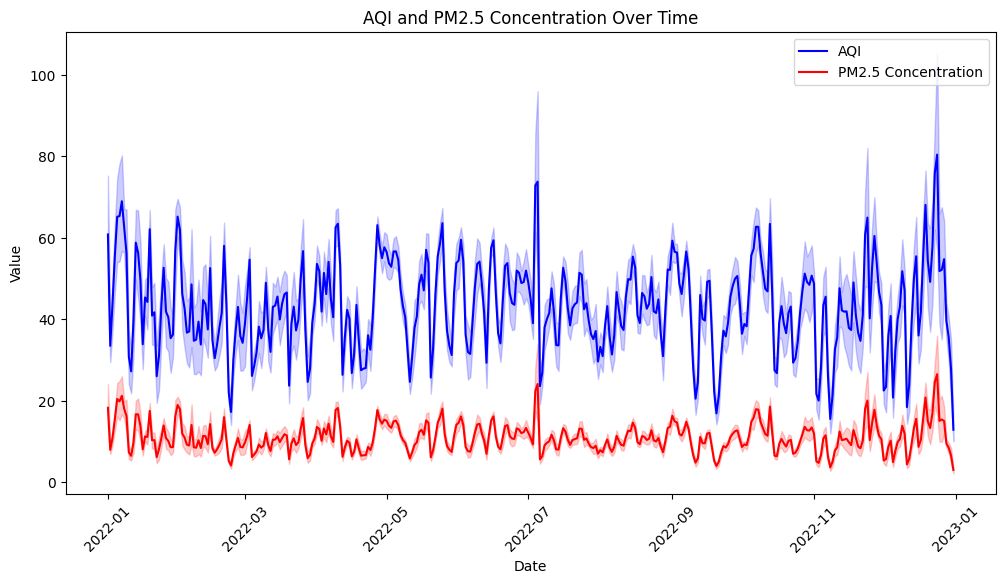

In [14]:
# Convert the "Date" column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="DAILY_AQI_VALUE", data=df, color="blue", label="AQI")
sns.lineplot(x="Date", y="Daily Mean PM2.5 Concentration", data=df, color="red", label="PM2.5 Concentration")

# Set x-axis label and title
plt.xlabel("Date")
plt.title("AQI and PM2.5 Concentration Over Time")

# Set y-axis labels
plt.ylabel("Value")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the legend
plt.legend()

# Display the plot
plt.show()


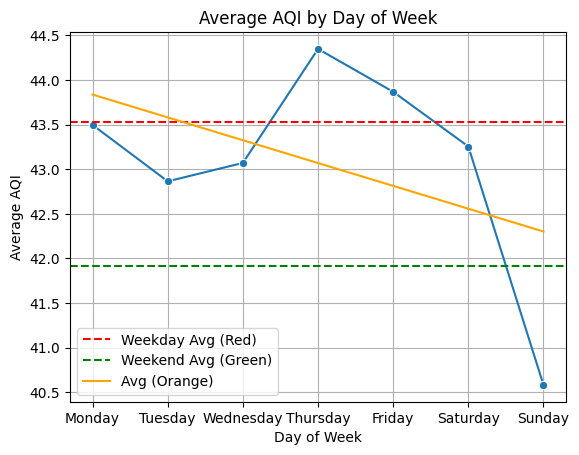

In [20]:
# Line plot

# Group the data by 'Day Of Week' and calculate the average AQI for each day
avg_aqi_by_day = df.groupby('Day Of Week')['DAILY_AQI_VALUE'].mean()

# Define the order of the days of the week for proper sorting on the x-axis
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line plot using Seaborn
sns.lineplot(data=avg_aqi_by_day.reindex(weekday_order), marker='o')

# Calculate the average AQI for weekdays and weekends
avg_weekday_aqi = avg_aqi_by_day[weekday_order[:5]].mean()
avg_weekend_aqi = avg_aqi_by_day[weekday_order[5:]].mean()

# Add horizontal lines for average weekday and weekend AQI
plt.axhline(avg_weekday_aqi, color='r', linestyle='--', label='Weekday Avg (Red)')
plt.axhline(avg_weekend_aqi, color='g', linestyle='--', label='Weekend Avg (Green)')

# Fit a line to the data points
x = np.arange(len(weekday_order))
y = avg_aqi_by_day.reindex(weekday_order)
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)
plt.plot(x, line(x), color='orange', label='Avg (Orange)')

# Customize the plot
plt.title('Average AQI by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average AQI')
plt.xticks(range(7), weekday_order)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

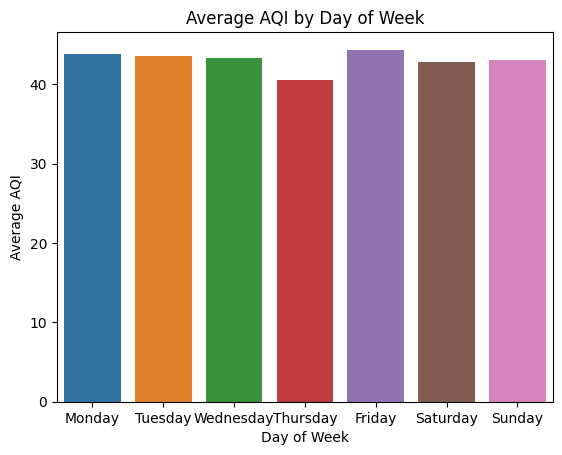

In [19]:
# Bar plot

# Group the data by 'Day Of Week' and calculate the average AQI for each day
avg_aqi_by_day = df.groupby('Day Of Week')['DAILY_AQI_VALUE'].mean()

# Define the order of the days of the week for proper sorting on the x-axis
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar plot using Seaborn
sns.barplot(x=weekday_order, y=avg_aqi_by_day)
plt.title('Average AQI by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average AQI')
plt.show()


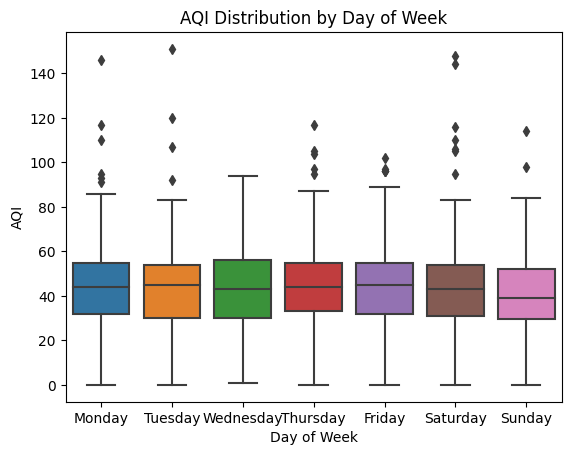

In [18]:
# Box plot

# Define the order of the days of the week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a box plot with the ordered weekdays
sns.boxplot(x='Day Of Week', y='DAILY_AQI_VALUE', data=df, order=weekday_order)

# Set the title and labels
plt.title('AQI Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('AQI')

# Show the plot
plt.show()


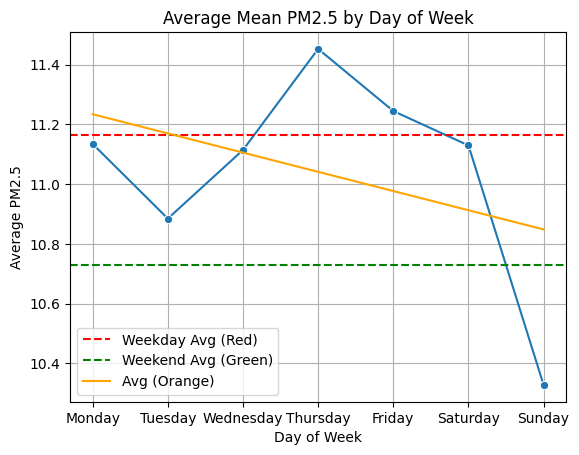

In [23]:
# Group the data by 'Day Of Week' and calculate the average PM2.5 for each day
avg_pm25_by_day = df.groupby('Day Of Week')['Daily Mean PM2.5 Concentration'].mean()

# Define the order of the days of the week for proper sorting on the x-axis
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line plot using Seaborn
sns.lineplot(data=avg_pm25_by_day.reindex(weekday_order), marker='o')

# Calculate the average PM2.5 for weekdays and weekends
avg_weekday_pm25 = avg_pm25_by_day[weekday_order[:5]].mean()
avg_weekend_pm25 = avg_pm25_by_day[weekday_order[5:]].mean()

# Add horizontal lines for average weekday and weekend PM2.5
plt.axhline(avg_weekday_pm25, color='r', linestyle='--', label='Weekday Avg (Red)')
plt.axhline(avg_weekend_pm25, color='g', linestyle='--', label='Weekend Avg (Green)')

# Fit a line to the data points
x = np.arange(len(weekday_order))
y = avg_pm25_by_day.reindex(weekday_order)
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)
plt.plot(x, line(x), color='orange', label='Avg (Orange)')

# Customize the plot
plt.title('Average Mean PM2.5 by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average PM2.5')
plt.xticks(range(7), weekday_order)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


**Observations**

Alameda County csv file contains 1793 values. Average daily AQI is 32. Average mean PM2.5 is 8.2. 
Los Angeles csv file contains 5134 values. Average daily AQI is 43. Average mean PM2.5 is 11.0. 
California csv file contains 56838 values. Average daily AQI is 33. Average mean PM2.5 is 8.6. 

Alameda County air quality is slightly better than California's average. However, Los Angeles' air quality is not good and is near moderate air quality levels.

# Machine Learning

**Just Playing**

In [ ]:
[]